In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/drug-classification/drug200.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.simplefilter("ignore")

In [3]:
df = pd.read_csv("../input/drug-classification/drug200.csv")
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [4]:
check = df.duplicated(keep='first')
sum(check)

0

In [5]:
df.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [6]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [7]:
len(df)

200

In [8]:
df = df.dropna()
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [9]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [10]:
df['Sex'].unique()

array(['F', 'M'], dtype=object)

In [11]:
df['Sex'] = df['Sex'].replace('F',0)
df['Sex'] = df['Sex'].replace('M',1)
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,HIGH,HIGH,25.355,DrugY
1,47,1,LOW,HIGH,13.093,drugC
2,47,1,LOW,HIGH,10.114,drugC
3,28,0,NORMAL,HIGH,7.798,drugX
4,61,0,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,0,LOW,HIGH,11.567,drugC
196,16,1,LOW,HIGH,12.006,drugC
197,52,1,NORMAL,HIGH,9.894,drugX
198,23,1,NORMAL,NORMAL,14.020,drugX


In [12]:
df['BP'].unique()

array(['HIGH', 'LOW', 'NORMAL'], dtype=object)

In [13]:
df['BP'] = df['BP'].replace('LOW',0)
df['BP'] = df['BP'].replace('NORMAL',1)
df['BP'] = df['BP'].replace('HIGH',2)
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,2,HIGH,25.355,DrugY
1,47,1,0,HIGH,13.093,drugC
2,47,1,0,HIGH,10.114,drugC
3,28,0,1,HIGH,7.798,drugX
4,61,0,0,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,0,0,HIGH,11.567,drugC
196,16,1,0,HIGH,12.006,drugC
197,52,1,1,HIGH,9.894,drugX
198,23,1,1,NORMAL,14.020,drugX


In [14]:
df['Cholesterol'].unique()

array(['HIGH', 'NORMAL'], dtype=object)

In [15]:
df['Cholesterol'] = df['Cholesterol'].replace('NORMAL',0)
df['Cholesterol'] = df['Cholesterol'].replace('HIGH',1)
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,2,1,25.355,DrugY
1,47,1,0,1,13.093,drugC
2,47,1,0,1,10.114,drugC
3,28,0,1,1,7.798,drugX
4,61,0,0,1,18.043,DrugY
...,...,...,...,...,...,...
195,56,0,0,1,11.567,drugC
196,16,1,0,1,12.006,drugC
197,52,1,1,1,9.894,drugX
198,23,1,1,0,14.020,drugX


In [16]:
df['Drug'].unique()

array(['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [17]:
df['Drug'] = df['Drug'].replace('drugA',0)
df['Drug'] = df['Drug'].replace('drugB',1)
df['Drug'] = df['Drug'].replace('drugC',2)
df['Drug'] = df['Drug'].replace('drugX',3)
df['Drug'] = df['Drug'].replace('DrugY',4)
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,2,1,25.355,4
1,47,1,0,1,13.093,2
2,47,1,0,1,10.114,2
3,28,0,1,1,7.798,3
4,61,0,0,1,18.043,4
...,...,...,...,...,...,...
195,56,0,0,1,11.567,2
196,16,1,0,1,12.006,2
197,52,1,1,1,9.894,3
198,23,1,1,0,14.020,3


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    int64  
 2   BP           200 non-null    int64  
 3   Cholesterol  200 non-null    int64  
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 10.9 KB


In [19]:
Xall = df.drop("Drug", axis = 1)
yall = df["Drug"]

In [20]:
from sklearn.model_selection import train_test_split
X, Xt, y, yt = train_test_split(Xall, yall, test_size=0.2, random_state=0)

In [21]:
from sklearn.preprocessing import MinMaxScaler
scl = MinMaxScaler().fit(X)
X = scl.transform(X)
Xt = scl.transform(Xt)

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
yp = cross_val_predict ( LogisticRegression(C=8, random_state=0), X, y, cv = 20)
train_acc = sum(yp == y) / len(y)

clf = LogisticRegression(C=8, random_state=0).fit(X, y)
yp = clf.predict(Xt)
test_acc = sum(yp == yt) / len(yt)

In [23]:
len(y)*0.10

16.0

In [24]:
[sum(y == 0),sum(y == 1)]

[20, 15]

In [25]:
sum(y==0) / (sum(y==0)+sum(y==1))

0.5714285714285714

In [26]:
clf = LogisticRegression(random_state=0).fit(X, y)
yp = clf.predict(Xt)
test_acc = sum(yp == yt) / len(yt)

In [27]:
train_acc

0.9125

In [28]:
test_acc

0.875

In [29]:
from lightgbm import LGBMClassifier
clf = LGBMClassifier(n_estimators=111,learning_rate=0.01,boosting_type='gbdt',num_leaves=29,
                     class_weight=None,colsample_bytree=1.0, max_depth=-1,min_split_gain=0.0)
clf.fit(X,y)

LGBMClassifier(learning_rate=0.01, n_estimators=111, num_leaves=29)

In [30]:
LGBMClassifier = clf.score(X, y)
print("LGBM_train :",LGBMClassifier)

LGBM_train : 1.0


In [31]:
LGBMClassifier = clf.score(Xt, yt)
print("LGBM_train :",LGBMClassifier)

LGBM_train : 0.975


In [32]:
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

clf1 = LogisticRegression(random_state=1)
clf2 = LGBMClassifier(random_state=1)
clf3 = KNeighborsClassifier(n_neighbors = 1)
eclf = StackingClassifier(
	estimators=[('lr', clf1), ('lgbm', clf2), ('knn', clf3)],
	stack_method = 'predict_proba',
	final_estimator=SVC( probability= True,random_state=1))


yp = cross_val_predict ( eclf , Xall, yall, cv = 2)
train_acc = sum(yp == yall) / len(yall)

In [33]:
train_acc

0.97

In [34]:
clf = eclf.fit(Xall, yall)
yp = clf.predict(Xt)
test_acc = sum(yp == yt) / len(yt)
test_acc

0.425

In [35]:
import shap
X_train_summary = shap.kmeans(Xall, 10)
shap.initjs()
explainer = shap.KernelExplainer(clf.predict_proba, X_train_summary)
shap_values = explainer.shap_values(Xt)

  0%|          | 0/40 [00:00<?, ?it/s]

In [36]:
names = df.columns

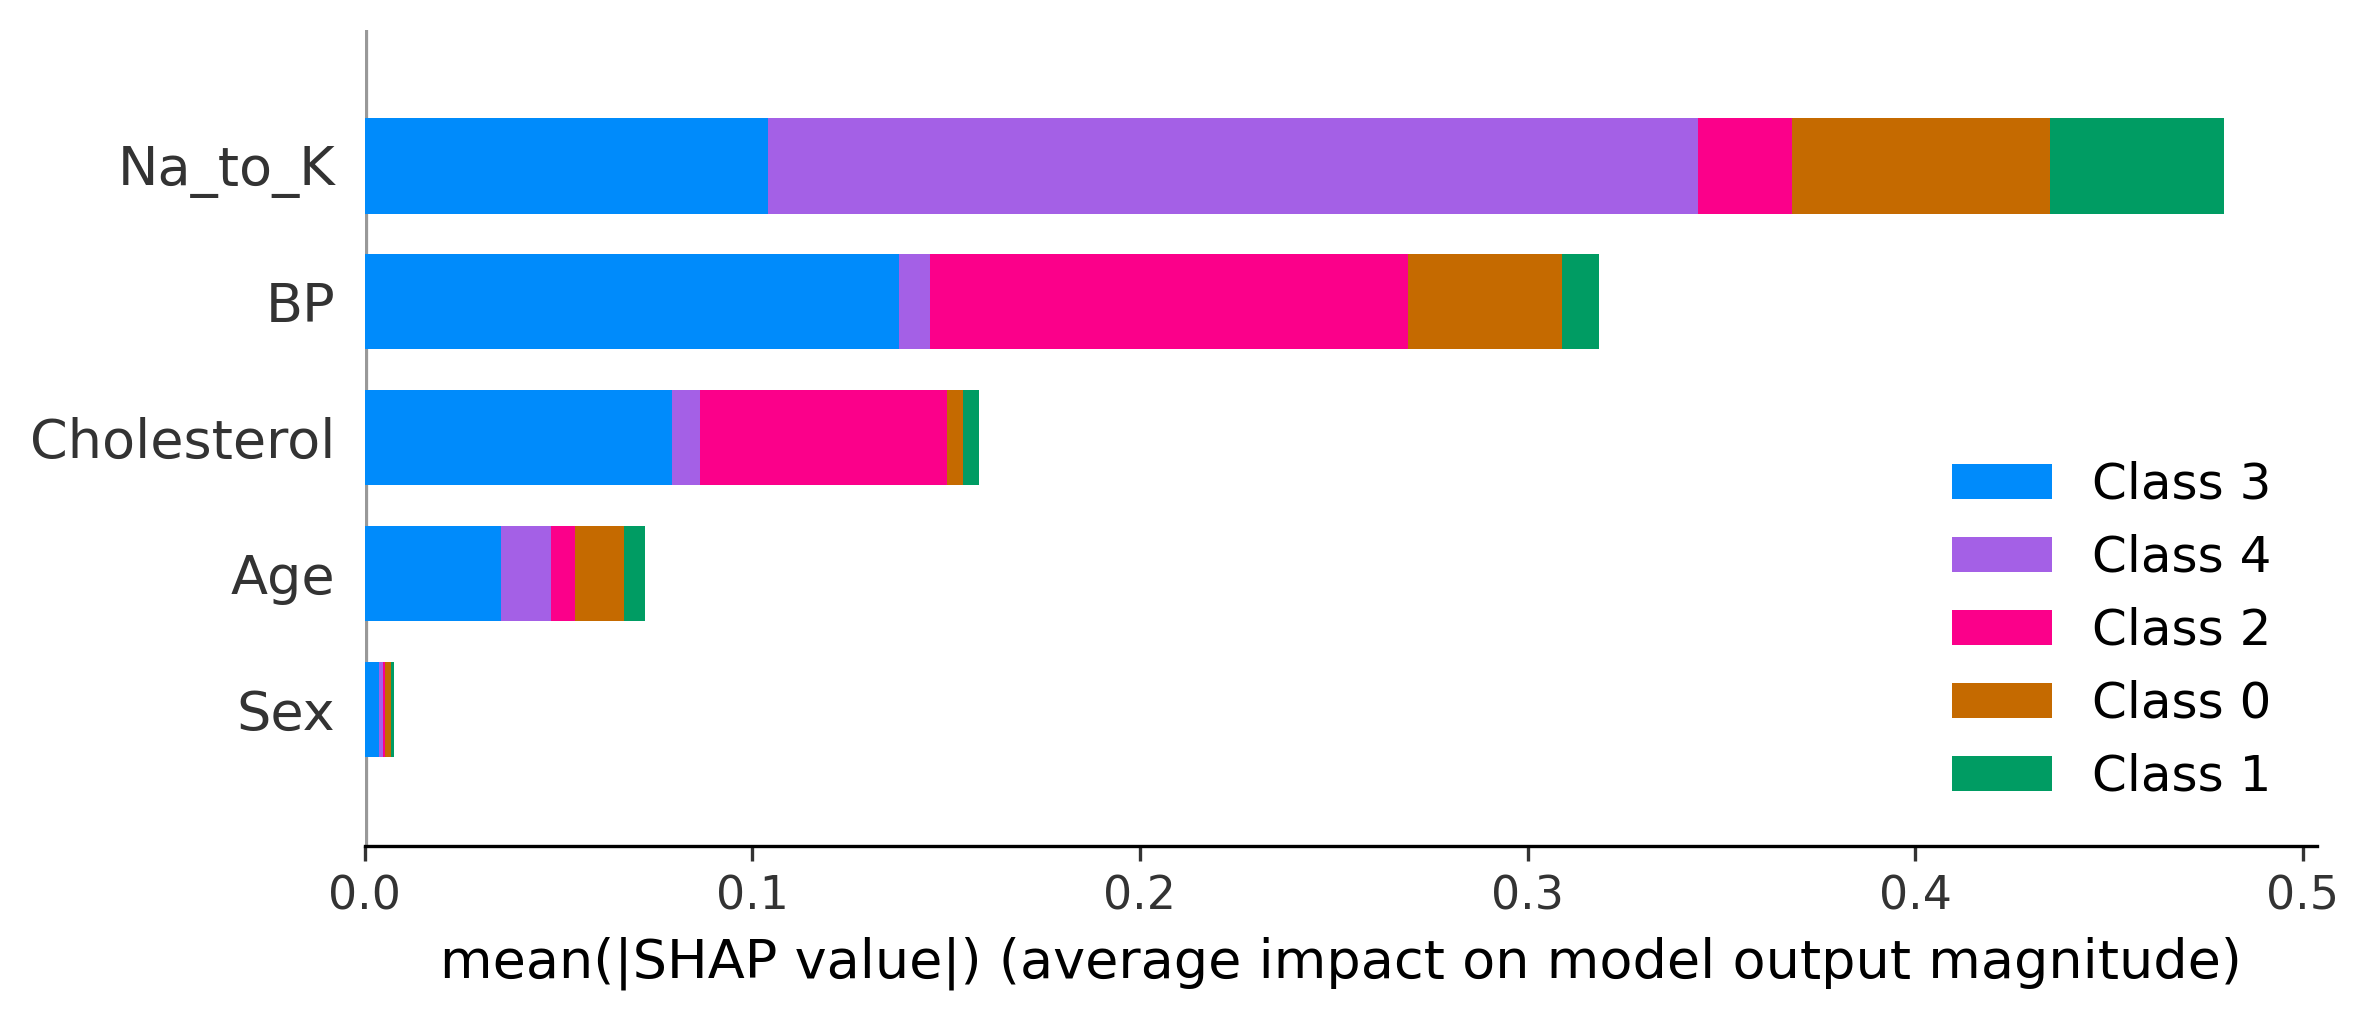

In [37]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 15),dpi=300)
shap.summary_plot(shap_values, Xt, feature_names = names,show=False, )

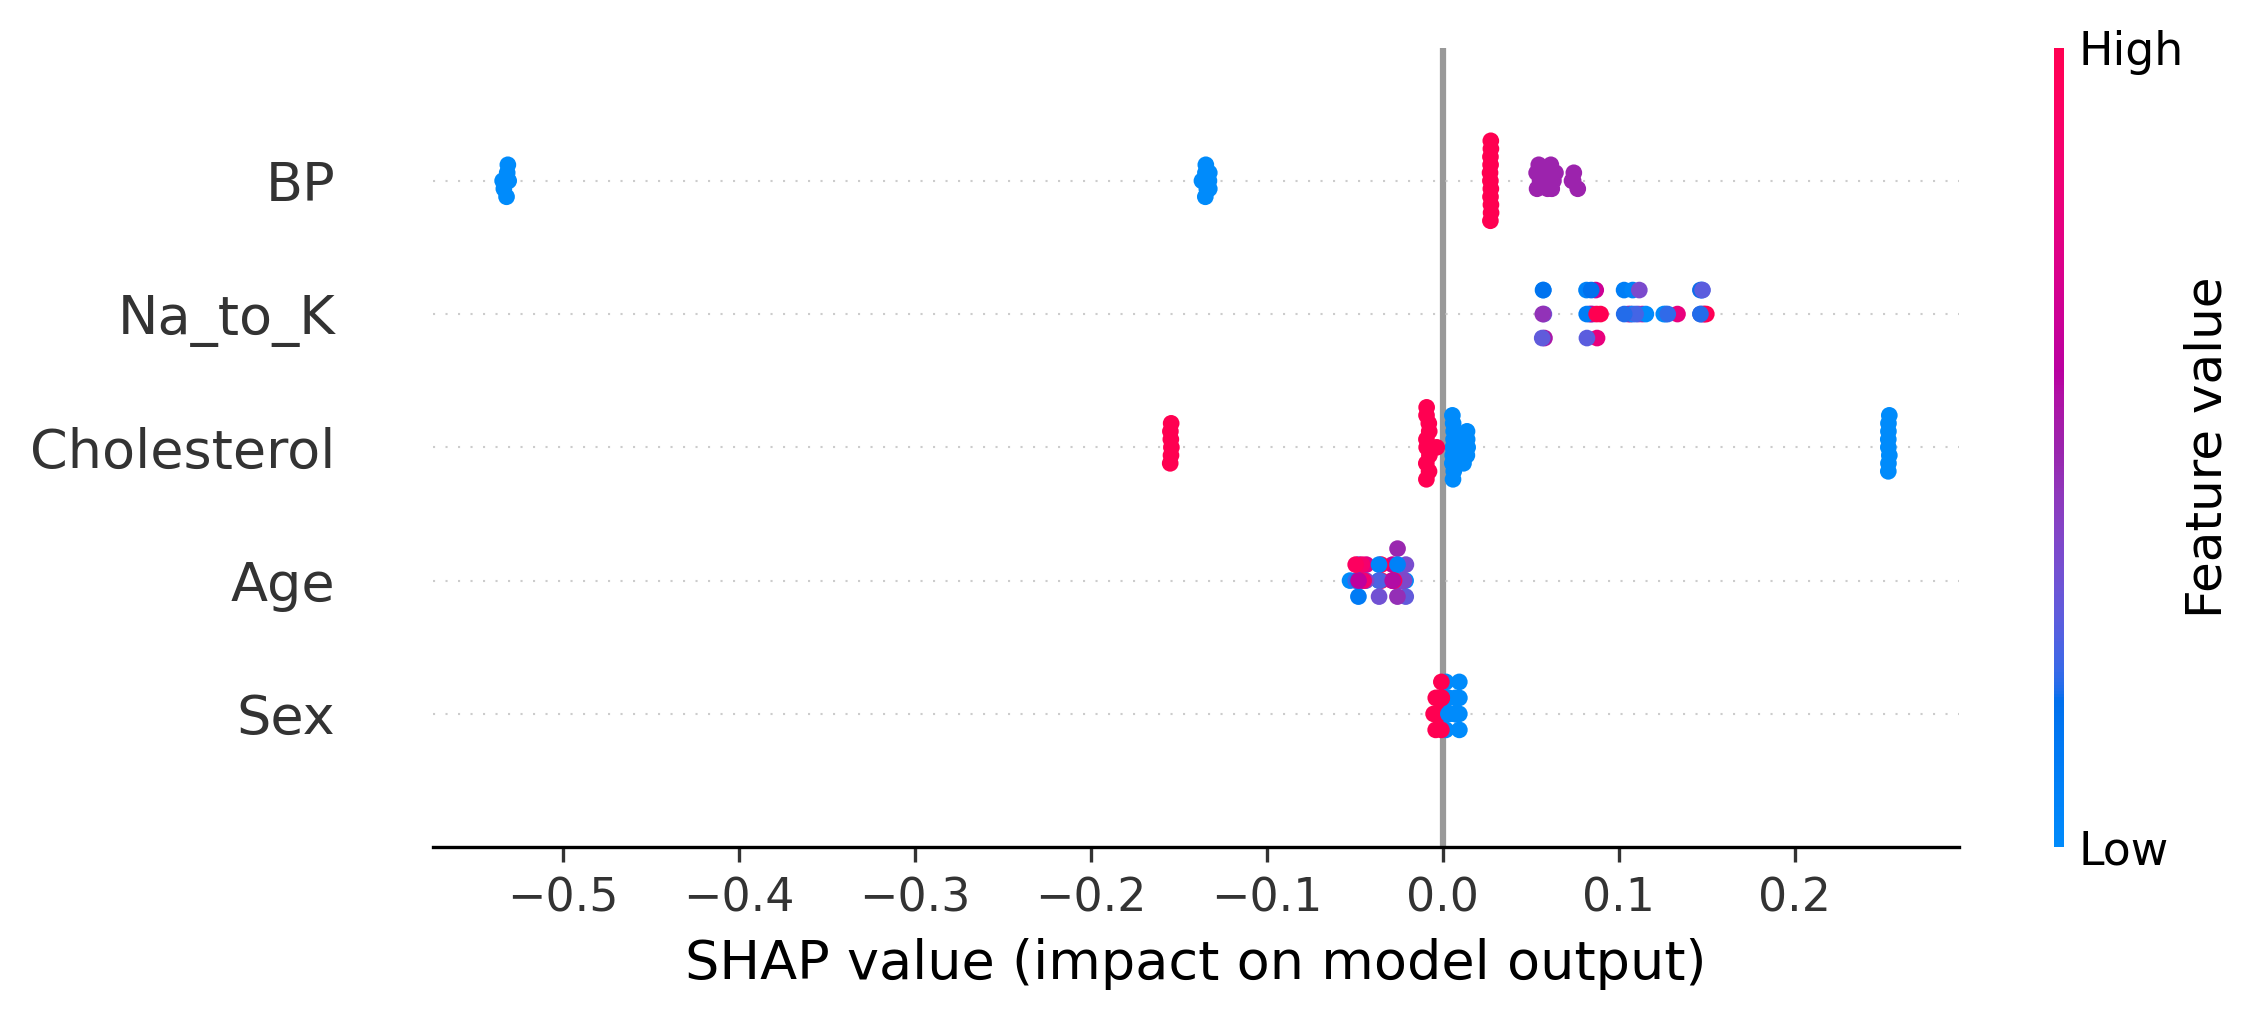

In [38]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 15),dpi=300)
shap.summary_plot(shap_values[3], Xt, feature_names = names,show=False, )